In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [16]:
image = cv2.imread('face1.jpg', 0)
template = cv2.imread('f1a.jpg', 0)
img2 = image.copy()
w, h = template.shape[::-1]

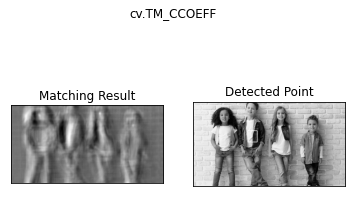

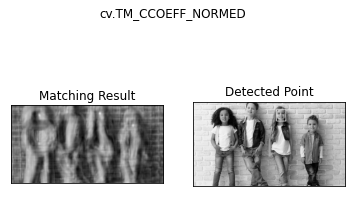

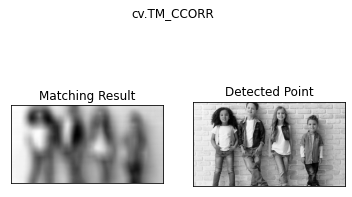

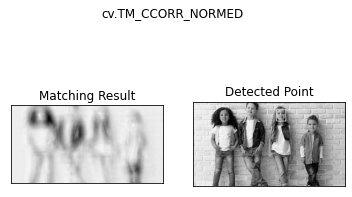

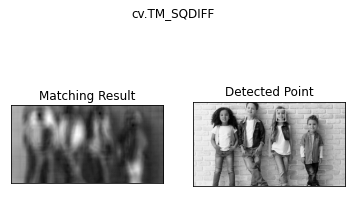

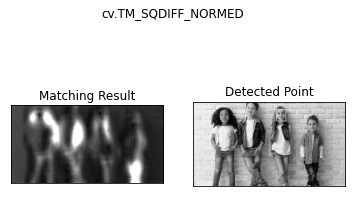

In [17]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

Discussion

Using the cv2.matchTemplate function we take the 3 parameters of the image followed by the template we are searching for and the method. There are multiple methods we can use and are all listed in the cv2 docs. Out of the six methods used to match the template the following returned a positive match:
cv.TM_CCOEFF_NORMED,
cv.TM_CCORR_NORMED,
cv.TM_SQDIFF,
cv.TM_SQDIFF_NORMED

The following two could not produce a match:
cv.TM_CCOEFF,
cv.TM_CCORR

The correaltion model and the coefficent models seem to only work when they a normilized. This could be due to the fact that when using the ccoeff and ccorr models the max value is taken as the best matches where as when we use the sqdiff models the global minimums are used the decribe the best match.